### [Stock Trading Strategy Using DEMA & Python](https://randerson112358.medium.com/stock-trading-strategy-using-dema-python-d36e66510a60)

#Description：該程序使用雙指數移動平均線 (DEMA) 來確定何時買賣股票

* When the short term DEMA (20 days) crosses above the long term DEMA (50 days) buy

* When the short term DEMA (20 days) crosses below the long term DEMA (50 days) sell

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')

In [5]:
symbol = "aapl"
df = yf.download(symbol,"2020-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.039879,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.683571,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.967216,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.548630,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.202728,108872000
...,...,...,...,...,...,...
2022-08-31,160.309998,160.580002,157.139999,157.220001,157.220001,87991100
2022-09-01,156.639999,158.419998,154.669998,157.960007,157.960007,74229900
2022-09-02,159.750000,160.360001,154.970001,155.809998,155.809998,76905200


In [9]:
fig = go.Figure(go.Candlestick(x=df.index,
  open=df['Open'],
  high=df['High'],
  low=df['Low'],
  close=df['Close']))
fig.show()

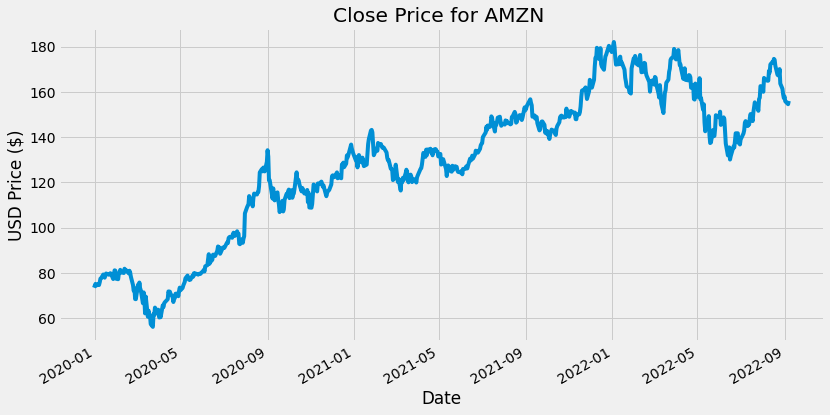

In [6]:
#Visually show the close price
df['Close'].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Close Price for AMZN ')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

DEMA = 2 * EMA_N — EMA_N 的 EMA

In [10]:
#Create a function to calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period, column):
  #Calculate the Exponential Moving Average for some time_period (in days)
  EMA = data[column].ewm(span=time_period, adjust=False).mean()
  #Calculate the DEMA
  DEMA = 2*EMA - EMA.ewm(span=time_period, adjust=False).mean()
  return DEMA

In [13]:
ST_day = 20 #Store the short term DEMA (20天)
LT_day = 50 #Store the long term DEMA (50天)
df['DEMA_short'] = DEMA(df, ST_day, 'Close') #Store the short term DEMA 
df['DEMA_long'] = DEMA(df, LT_day, 'Close') #Store the long term DEMA 

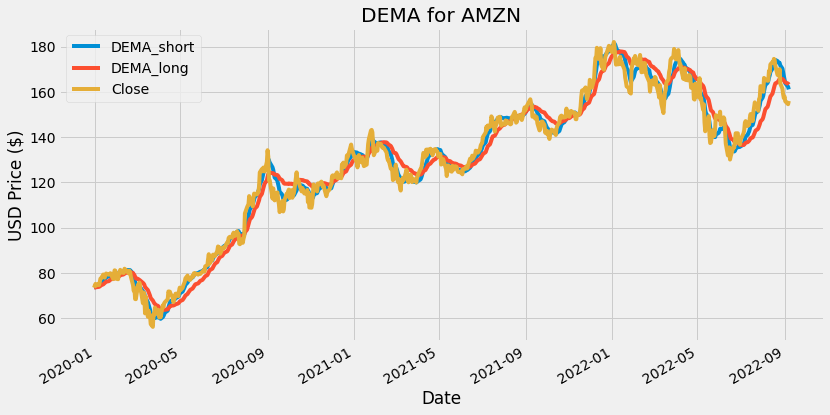

In [12]:
#Plot the chart
#Create a list of columns to keep
column_list = ['DEMA_short', 'DEMA_long', 'Close']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('DEMA for AMZN')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [18]:
def DEMA_Strategy(data):
  buy_list = [] #Create a list to store the price at which to buy
  sell_list = [] #Create a list to store the price at which to sell
  flag =  False #Create a flag to determine when the indicators cross
  #Loop through the data
  for i in range(0,len(data)):
      #Check if the Short Term DEMA crosses above the Long Term DEMA
      if data['DEMA_short'][i]  > data['DEMA_long'][i] and flag == False:
          buy_list.append(data['Close'][i])
          sell_list.append(np.nan)
          flag = True
      #Check if the Short Term DEMA crosses below the Long Term DEMA    
      elif data['DEMA_short'][i]  < data['DEMA_long'][i] and flag == True:
          buy_list.append(np.nan)
          sell_list.append(data['Close'][i])
          flag = False
      else:#Else they didn't cross
          buy_list.append(np.nan)
          sell_list.append(np.nan)
  #Store the Buy and Sell signals in the data set
  data['Buy'] = buy_list
  data['Sell'] = sell_list

In [19]:
#Run the Strategy to get the buy and sell signals
DEMA_Strategy(df)

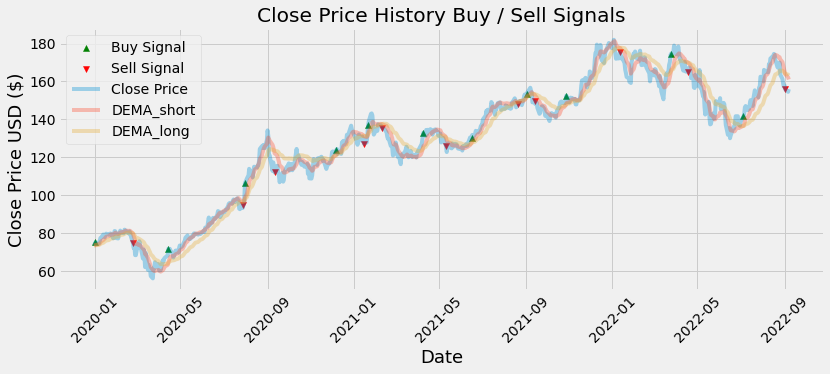

In [20]:
# Visually Show The Stock Buy and Sell Signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1) #Plot the buy signal
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1) #Plot the sell signal
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['DEMA_short'],  label='DEMA_short', alpha = 0.35) #plot the Short Term DEMA
plt.plot( df['DEMA_long'],  label='DEMA_long', alpha = 0.35) #plot the Long Term DEMA
plt.xticks(rotation=45)#Rotate the dates 45 degrees
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()